# Развёртывание датасета

Устанавливаем pipenv и создаем виртуальную среду, затем устанавливаем необходимые библиотеки в этой среде

In [1]:
! pip install --user pipenv
! pipenv install pandas
! pipenv install numpy
! pipenv install matplotlib

Installing pandas...

Installing dependencies from Pipfile.lock (5de21f)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.



[    ] Installing...
[=   ] Installing pandas...
[==  ] Installing pandas...
[=== ] Installing pandas...
[ ===] Installing pandas...
[  ==] Installing pandas...
[   =] Installing pandas...
[    ] Installing pandas...
[   =] Installing pandas...
[  ==] Installing pandas...
[ ===] Installing pandas...
[====] Installing pandas...
[=== ] Installing pandas...
[==  ] Installing pandas...
[=   ] Installing pandas...
[    ] Installing pandas...
[=   ] Installing pandas...
[==  ] Installing pandas...
[=== ] Installing pandas...
[ ===] Installing pandas...
[  ==] Installing pandas...
[   =] Installing pandas...
[    ] Installing pandas...
Adding pandas to Pipfile's [packages]...
Installation Succeeded 


Installing numpy...

Installing dependencies from Pipfile.lock (074cd0)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.



[    ] Installing..
[=   ] Installing numpy..
[==  ] Installing numpy..
[=== ] Installing numpy..
[ ===] Installing numpy..
[  ==] Installing numpy..
[   =] Installing numpy..
[    ] Installing numpy..
[   =] Installing numpy..
[  ==] Installing numpy..
[ ===] Installing numpy..
[====] Installing numpy..
[=== ] Installing numpy..
[==  ] Installing numpy..
[=   ] Installing numpy..
[    ] Installing numpy..
[=   ] Installing numpy..
[==  ] Installing numpy..
[=== ] Installing numpy..
[ ===] Installing numpy..
[  ==] Installing numpy...
Adding numpy to Pipfile's [packages]...
Installation Succeeded 
Pipfile.lock (5de21f) out of date, updating to (074cd0)...
Locking [dev-packages] dependencies...
Locking [packages] dependencies...

[    ] Locking...
Building requirements...

Resolving dependencies...

[=   ] Locking..
[==  ] Locking..
[=== ] Locking..
[ ===] Locking..
[  ==] Locking..
[   =] Locking..
[    ] Locking..
[   =] Locking..
[  ==] Locking..
[ ===] Locking..
[====] Locking..


Installing matplotlib...

Installing dependencies from Pipfile.lock (d69bef)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.



[    ] Installing..
[=   ] Installing matplotlib..
[==  ] Installing matplotlib..
[=== ] Installing matplotlib..
[ ===] Installing matplotlib..
[  ==] Installing matplotlib..
[   =] Installing matplotlib..
[    ] Installing matplotlib..
[   =] Installing matplotlib..
[  ==] Installing matplotlib..
[ ===] Installing matplotlib..
[====] Installing matplotlib..
[=== ] Installing matplotlib..
[==  ] Installing matplotlib..
[=   ] Installing matplotlib..
[    ] Installing matplotlib..
[=   ] Installing matplotlib..
[==  ] Installing matplotlib..
[=== ] Installing matplotlib..
[ ===] Installing matplotlib..
[  ==] Installing matplotlib..
[   =] Installing matplotlib..
[    ] Installing matplotlib..
[   =] Installing matplotlib..
[  ==] Installing matplotlib..
[ ===] Installing matplotlib..
[====] Installing matplotlib..
[=== ] Installing matplotlib..
[==  ] Installing matplotlib..
[=   ] Installing matplotlib..
[    ] Installing matplotlib..
[=   ] Installing matplotlib..
[==  ] Installing 

Импортируем необходимые библиотеки

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Загружаем данные, после чего удаляем пустые колонки

In [28]:
dataset = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv', 
                   dtype={'Violation Location' : object})

#Drop null columns
dataset.drop(dataset.columns[range(40, 51)], axis=1, inplace=True)

c:\users\sandor\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Конвертируем поле 'Issue Date' в дату, затем оставляем в датасете только те строки, в которых автомобиль одна из трёх следующих марок: 'DODGE', 'TOYOT', 'HYUND', а дата "происшествия" находится в периоде между 2013-01-01 и 2015-01-01.

In [29]:
dataset['Issue Date'] = dataset['Issue Date'].apply(pd.to_datetime)

In [30]:
dataset = dataset.loc[(dataset['Vehicle Make'].isin(['DODGE', 'TOYOT', 'HYUND'])) & 
                      ((dataset['Issue Date'] >= pd.Timestamp('2013-01-01')) & (dataset['Issue Date'] <= pd.Timestamp('2015-01-01'))) & 
                      ((dataset['Vehicle Year'] >= 1900.0) & (dataset['Vehicle Year'] <= 2015.0))]

In [32]:
dataset.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
8,1283983631,GBH9379,NY,PAS,2013-08-07,24,SDN,TOYOT,X,63430,...,BBBBBBB,ALL,ALL,WHITE,0.0,2001.0,-,0.0,NaN,NaN
10,1283983679,M367CN,NY,PAS,2013-07-18,24,SDN,HYUND,H,0,...,BBBBBBB,ALL,ALL,BLUE,0.0,2010.0,-,0.0,NaN,NaN
11,1283983734,GAR6813,NY,PAS,2013-07-18,24,SDN,TOYOT,H,0,...,BBBBBBB,ALL,ALL,TAN,0.0,1998.0,-,0.0,NaN,NaN
16,1286246398,GFC5338,NY,PAS,2013-07-26,14,SDN,TOYOT,T,0,...,YYYYYYY,0800A,1000P,GRAY,0.0,2010.0,-,0.0,NaN,NaN
23,1286799648,GDE3973,NY,PAS,2013-07-20,40,SDN,TOYOT,T,0,...,BBBBBBB,ALL,ALL,TN,0.0,2003.0,-,9.0,NaN,NaN


In [33]:
dataset.tail()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
9100243,8006050405,APZ5782,NY,PAS,2014-06-25,20,SUBN,TOYOT,T,9140,...,YYYYY,0800A,0600P,SILVE,NaN,2007.0,NaN,0.0,06 4,20A-No Parking (Non-COM)
9100248,8006050491,EGX5038,NY,PAS,2014-06-25,37,SUBN,TOYOT,T,9540,...,Y,0800A,1000P,GY,NaN,2008.0,406-9426,0.0,06 4,37-Expired Muni Meter
9100249,8006050508,DHE4798,NY,PAS,2014-06-25,37,SUBN,TOYOT,T,9540,...,Y,0800A,1000P,GY,NaN,2005.0,406-9424,0.0,06 4,37-Expired Muni Meter
9100261,8006100214,FYD4422,NY,PAS,2014-06-24,21,4DSD,TOYOT,T,67530,...,Y Y,1130A,0100P,WH,NaN,2012.0,NaN,0.0,08 3,21-No Parking (street clean)
9100271,8006150151,CWN4247,NY,PAS,2014-06-25,37,SUBN,TOYOT,T,0,...,YYYYYYY,NaN,NaN,GY,NaN,2004.0,373-0123,0.0,10 3,37-Expired Muni Meter


In [34]:
dataset.drop(columns=dataset.columns.difference(['Issue Date', 'Vehicle Make', 'Violation Time', 'House Number', 'Street Name', 'Vehicle Year']), axis=1, inplace=True)
dataset.head()

,Issue Date,Vehicle Make,Violation Time,House Number,Street Name,Vehicle Year
8,2013-08-07,TOYOT,0437A,100,N.PORTLAND AVE,2001.0
10,2013-07-18,HYUND,0845A,NaN,760 BROADWAY BROOKLY,2010.0
11,2013-07-18,TOYOT,0907A,NaN,760 BROADWAY BROOKLY,1998.0
16,2013-07-26,TOYOT,1142A,145,PROSPECT PKWAY,2010.0
23,2013-07-20,TOYOT,0324P,NaN,E/S RIVER TER.,2003.0


In [36]:
dataset.tail()

,Issue Date,Vehicle Make,Violation Time,House Number,Street Name,Vehicle Year
9100243,2014-06-25,TOYOT,1104A,W,39th Ave,2007.0
9100248,2014-06-25,TOYOT,0103P,133-32,41st Ave,2008.0
9100249,2014-06-25,TOYOT,0105P,133-24,41st Ave,2005.0
9100261,2014-06-24,TOYOT,1140A,560,Ocean Ave,2012.0
9100271,2014-06-25,TOYOT,0115P,NaN,Other-See Comments,2004.0


In [37]:
dataset.set_index('Issue Date',inplace=True)

In [38]:
dataset.head()

,Vehicle Make,Violation Time,House Number,Street Name,Vehicle Year
Issue Date,,,,,
2013-08-07,TOYOT,0437A,100,N.PORTLAND AVE,2001.0
2013-07-18,HYUND,0845A,NaN,760 BROADWAY BROOKLY,2010.0
2013-07-18,TOYOT,0907A,NaN,760 BROADWAY BROOKLY,1998.0
2013-07-26,TOYOT,1142A,145,PROSPECT PKWAY,2010.0
2013-07-20,TOYOT,0324P,NaN,E/S RIVER TER.,2003.0


In [39]:
dataset.tail()

,Vehicle Make,Violation Time,House Number,Street Name,Vehicle Year
Issue Date,,,,,
2014-06-25,TOYOT,1104A,W,39th Ave,2007.0
2014-06-25,TOYOT,0103P,133-32,41st Ave,2008.0
2014-06-25,TOYOT,0105P,133-24,41st Ave,2005.0
2014-06-24,TOYOT,1140A,560,Ocean Ave,2012.0
2014-06-25,TOYOT,0115P,NaN,Other-See Comments,2004.0


In [40]:
dataset.describe()

,Vehicle Year
count,1.066655e+06
mean,2.007093e+03
std,5.155833e+00
min,1.970000e+03
25%,2.004000e+03
50%,2.008000e+03
75%,2.012000e+03
max,2.015000e+03


# Визуализируем датасет

<AxesSubplot:xlabel='Issue Date'>

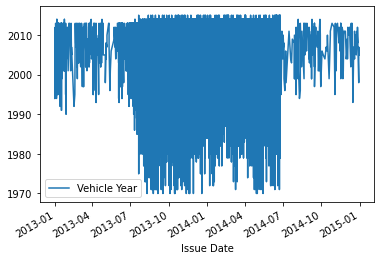

In [41]:
dataset.plot()

<AxesSubplot:xlabel='Issue Date'>

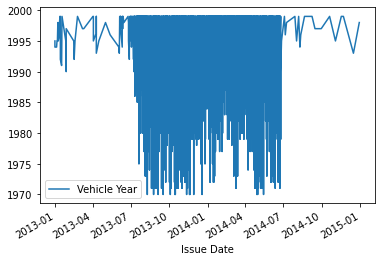

In [43]:
dataset.loc[dataset['Vehicle Year'] < 2000.0].plot()

In [ ]:
dataset.loc[dataset['Vehicle Year'] >= 2000.0].plot()